Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [61]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
#### load the movie dataset and create their dataframes

df = pd.read_csv('movies.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [64]:
df=df.drop(['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies'], axis=1)

#### Remove any duplicate rows

In [65]:
df=df.drop_duplicates()
df

,budget,genres,id,original_title,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,Avatar,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,Pirates of the Caribbean: At World's End,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,Spectre,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,The Dark Knight Rises,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,John Carter,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,El Mariachi,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,Newlyweds,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"Signed, Sealed, Delivered",1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,Shanghai Calling,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [66]:
df = df.drop(df[df.budget == 0].index)
df = df.drop(df[df.revenue == 0].index)

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [67]:
# Change the release_date column to DateTime column
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y %m %d')

# Extract the release year from every release date
df['release_date'].dt.year

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4773    1994
4788    1972
4792    1997
4796    2004
4798    1992
Name: release_date, Length: 3229, dtype: int64

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [68]:
df = df.astype({"budget":"int","revenue":"int"})

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [69]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(df.index,df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
#parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

df.head()

,budget,genres,id,original_title,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,Avatar,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,-1507002209,162.0,"['English', 'Español']",Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,Pirates of the Caribbean: At World's End,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",206647,Spectre,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,The Dark Knight Rises,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,John Carter,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [70]:
df1=df.sort_values(by='budget', ascending=False)
df1=df1[['original_title','budget', 'revenue']].head()
df1

,original_title,budget,revenue
17,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
1,Pirates of the Caribbean: At World's End,300000000,961000000
7,Avengers: Age of Ultron,280000000,1405403694
10,Superman Returns,270000000,391081192
4,John Carter,260000000,284139100


In [71]:
df2=df.sort_values(by='budget')
df2=df2[['original_title','budget', 'revenue']].head()
df2

,original_title,budget,revenue
4238,Modern Times,1,8500000
3611,A Farewell to Arms,4,25
3372,Split Second,7,5
3419,Bran Nue Dae,7,7
4608,The Prophecy,8,16


In [72]:
df3=pd.merge(df1, df2, how='outer')
df3.sort_values(by='revenue', ascending=False)

,original_title,budget,revenue
2,Avengers: Age of Ultron,280000000,1405403694
0,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
1,Pirates of the Caribbean: At World's End,300000000,961000000
3,Superman Returns,270000000,391081192
4,John Carter,260000000,284139100
5,Modern Times,1,8500000
6,A Farewell to Arms,4,25
9,The Prophecy,8,16
8,Bran Nue Dae,7,7
7,Split Second,7,5


#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [73]:
# profit column made of revenue-budget for each row
df['profit']=df['revenue']-df['budget']
df.sort_values(by='profit', ascending=False)[['original_title', 'profit']].head()

,original_title,profit
25,Titanic,1645034188
28,Jurassic World,1363528810
44,Furious 7,1316249360
16,The Avengers,1299557910
7,Avengers: Age of Ultron,1125403694


In [74]:
x=df.sort_values(by='profit', ascending=False)

In [75]:
x.iloc[:1][['original_title', 'profit']]

,original_title,profit
25,Titanic,1645034188


In [76]:
x.iloc[-1:][['original_title', 'profit']] #last value where values sorted descendingly

,original_title,profit
0,Avatar,-1744002209


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



In [21]:
df.sort_values(by='popularity', ascending=False)[['original_title', 'popularity']]

,original_title,popularity
546,Minions,875.581305
95,Interstellar,724.247784
788,Deadpool,514.569956
94,Guardians of the Galaxy,481.098624
127,Mad Max: Fury Road,434.278564
...,...,...
4065,Mi America,0.039007
2970,There Goes My Baby,0.037073
3225,Limbo,0.034259
4105,"The Book of Mormon Movie, Volume 1: The Journey",0.031947


In [22]:
df[df.vote_average > 7][['original_title', 'vote_average']].sort_values(by='vote_average', ascending=False) #dataframe made of 2 columns, selected rows where vote average above 7 and sorted the rows by vote_average descendingly

,original_title,vote_average
1881,The Shawshank Redemption,8.5
2970,There Goes My Baby,8.5
3337,The Godfather,8.4
1818,Schindler's List,8.3
3232,Pulp Fiction,8.3
...,...,...
978,The Life Aquatic with Steve Zissou,7.1
1745,My Sister's Keeper,7.1
3436,The Messenger,7.1
1720,Kick-Ass,7.1


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [23]:
y=df.sort_values(by='profit', ascending=False)
y1=y.iloc[:1] #sorted descendingly and take first value
y1['release_date'] #show only specific column from dataframe

25   1997-11-18
Name: release_date, dtype: datetime64[ns]

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

Text(0.5, 0, 'Genres')

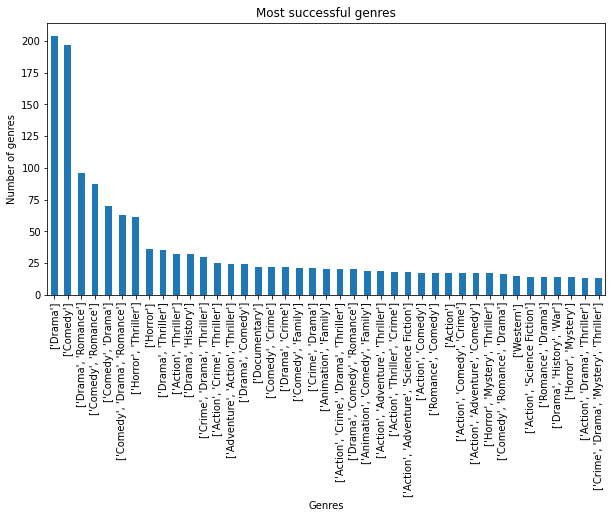

In [24]:
df.genres.value_counts()[0:41].plot(kind='bar', figsize=(10,5)) #frequency of several genres combination
plt.title("Most successful genres")
plt.ylabel('Number of genres')
plt.xlabel('Genres')

<AxesSubplot: >

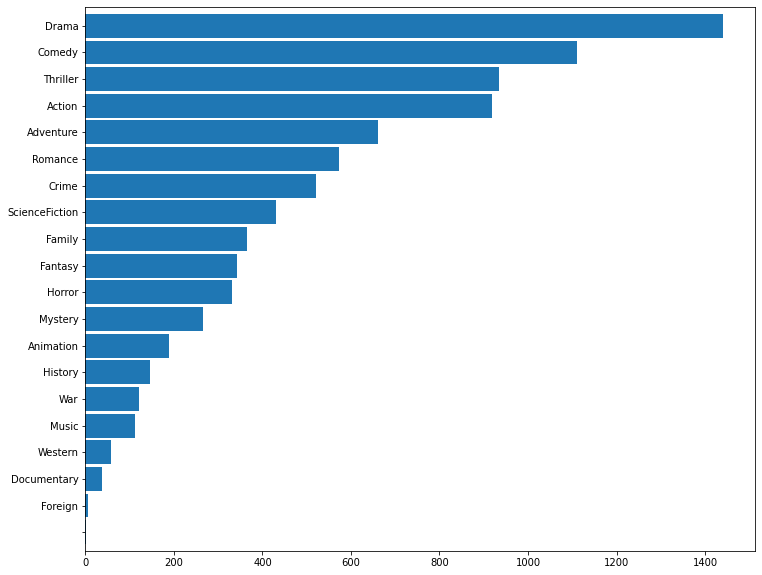

In [25]:
df['genres']=df['genres'].astype(str).str.strip('[]').str.replace(' ','').str.replace("'",'')
df['genres']=df['genres'].str.split(',')
df.head()
plt.subplots(figsize=(12,10))
list1=[]

# extending the list of genres to collect all the genres of all the profitable movies
for i in df['genres']:
    list1.extend(i)

genre_count_series = pd.Series(list1).value_counts().sort_values(ascending=True)

ax = genre_count_series.plot.barh(
    width=0.9)
ax

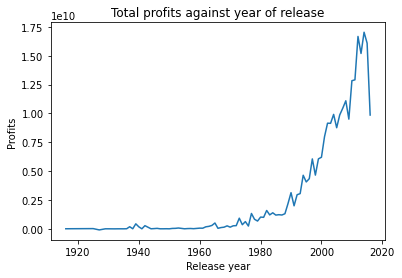

In [26]:
#### Generate three different interesting visualisations with a data story.
df['release_year'] = df['release_date'].dt.year #create new column with just the year

profits_year = df.groupby('release_year')['profit'].sum() #group profit by release year and sum for each group

plt.xlabel('Release year')
plt.ylabel('Profits')
plt.title('Total profits against year of release')
plt.plot(profits_year)

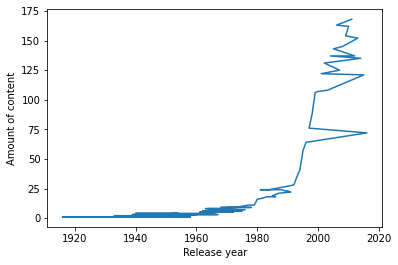

In [37]:
df['release_year'].value_counts()
plt.xlabel('Release year')
plt.ylabel('Amount of content')
plt.plot(df['release_year'].value_counts()) #number of rows with specific column values 

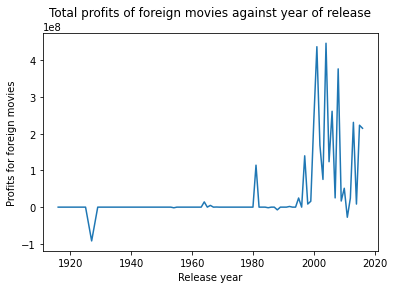

In [28]:
df['profits_foreign']=df[df['original_language']!='en']['profit'] #create new column that takes the value of profit where original language is not english
foreign_profits_year = df.groupby('release_year')['profits_foreign'].sum() 
plt.xlabel('Release year')
plt.ylabel('Profits for foreign movies')
plt.title('Total profits of foreign movies against year of release')
plt.plot(foreign_profits_year)

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)